<a href="https://colab.research.google.com/github/au171/Busi525_hw1/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)


N = 5
T = 120
T1 = 40
target_sd = 0.10 / np.sqrt(12)

def simulation():
    mu = np.random.uniform(0.05/12, 0.15/12, N)
    sigma = np.random.uniform(0.05/np.sqrt(12), 0.60/np.sqrt(12), N)
    D = np.diag(sigma)
    C = np.full((N, N), 0.5)
    np.fill_diagonal(C, 1)
    covar_mat = D @ C @ D
    returns = np.random.multivariate_normal(mu, covar_mat, T)

    # Initialize containers for portfolio returns
    plug_rets = []
    true_returns_panel = []
    ew_rets = []

    for t in range(T1, T - 1):
        historical_returns = returns[:t + 1]
        mu_hat = np.mean(historical_returns, axis=0)
        covar_mat_hat = np.cov(historical_returns, rowvar=False)

        if np.any(np.linalg.eigvals(covar_mat_hat) <= 0):
            covar_mat_hat = np.diag(np.diag(covar_mat_hat))

        weights_plugin = np.linalg.inv(covar_mat_hat) @ mu_hat
        weights_plugin *= target_sd/np.sqrt(weights_plugin.T @ covar_mat_hat @ weights_plugin)

        next_month_return = returns[t + 1]
        plugin_return = np.dot(weights_plugin, next_month_return)
        plug_rets.append(plugin_return)

        weights_true = np.linalg.inv(covar_mat) @ mu
        weights_true *= target_sd/np.sqrt(weights_true.T @ covar_mat @ weights_true)
        true_return = np.dot(weights_true, next_month_return)
        true_returns_panel.append(true_return)

        ew = np.array([1 / N] * N)
        ew *= target_sd/np.sqrt(ew.T @ covar_mat_hat @ ew)
        equal_return = np.dot(ew, next_month_return)
        ew_rets.append(equal_return)

    return plug_rets, true_returns_panel, ew_rets

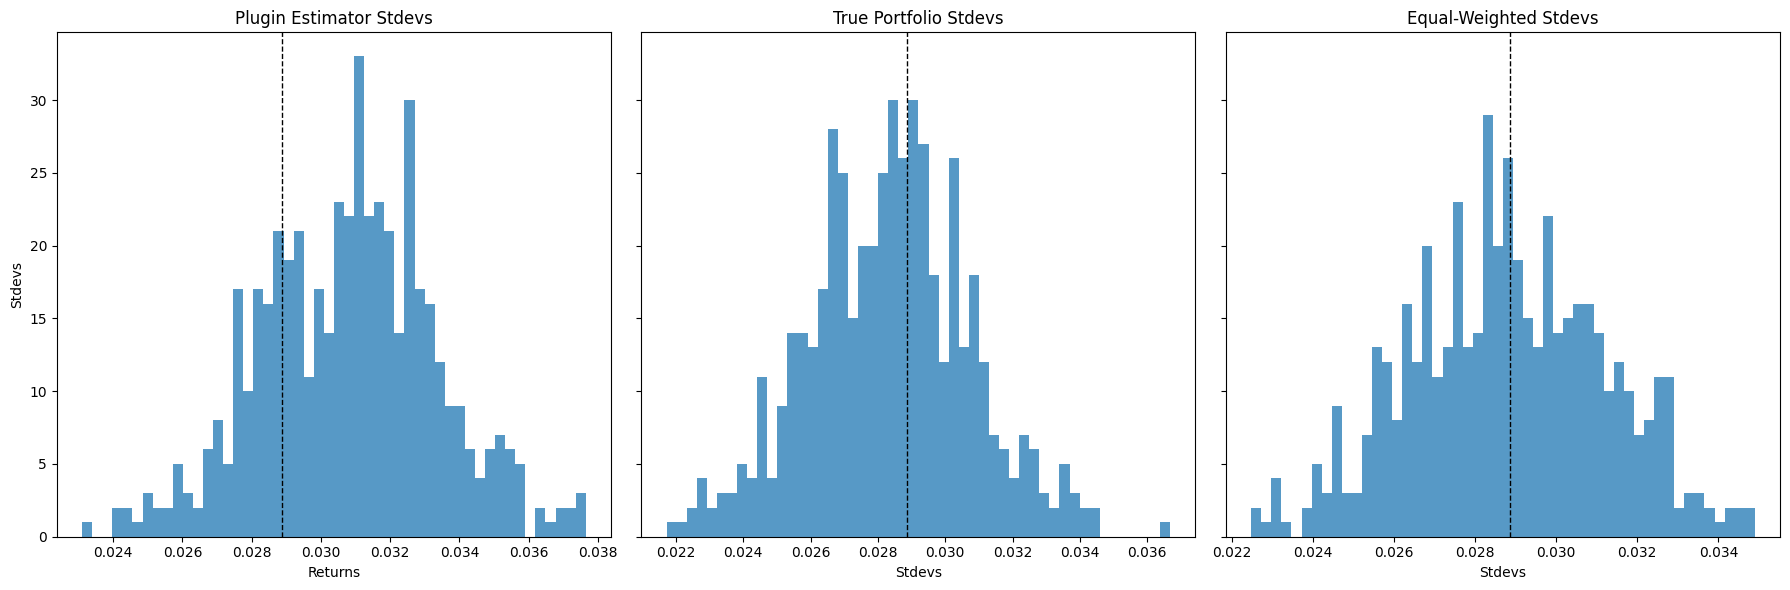

In [2]:
all_plugin_stds = []
all_plugin_sr = []
all_true_stds = []
all_true_sr = []
all_ew_stds = []
all_ew_sr = []

for _ in range(500):
    plugin_returns, true_returns, ew_returns = simulation()

    all_plugin_stds.append(np.nanstd(plugin_returns))
    all_true_stds.append(np.nanstd(true_returns))
    all_ew_stds.append(np.nanstd(ew_returns))

    all_plugin_sr.append(np.nanmean(plugin_returns)/np.nanstd(plugin_returns))
    all_true_sr.append(np.nanmean(true_returns)/np.nanstd(true_returns))
    all_ew_sr.append(np.nanmean(ew_returns)/np.nanstd(ew_returns))

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax[0].hist(all_plugin_stds, bins=50, alpha=0.75, label='Plugin')
ax[0].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)

ax[0].set_title('Plugin Estimator Stdevs')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('Stdevs')

ax[1].hist(all_true_stds, bins=50, alpha=0.75, label='True')
ax[1].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[1].set_title('True Portfolio Stdevs')
ax[1].set_xlabel('Stdevs')

ax[2].hist(all_ew_stds, bins=50, alpha=0.75, label='Equal-Weighted')
ax[2].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[2].set_title('Equal-Weighted Stdevs')
ax[2].set_xlabel('Stdevs')

plt.tight_layout()
plt.show()


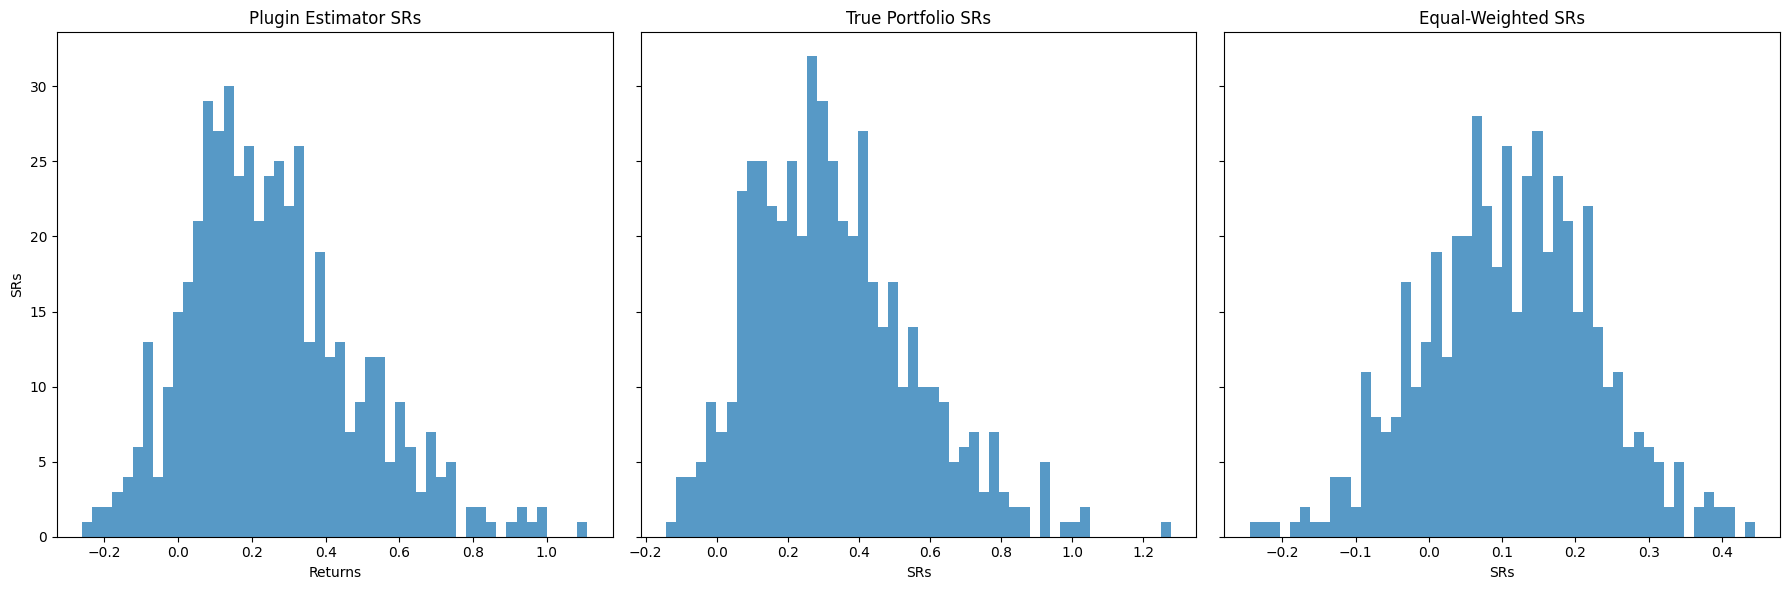

In [3]:
# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax[0].hist(all_plugin_sr, bins=50, alpha=0.75, label='Plugin')

ax[0].set_title('Plugin Estimator SRs')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('SRs')

ax[1].hist(all_true_sr, bins=50, alpha=0.75, label='True')
ax[1].set_title('True Portfolio SRs')
ax[1].set_xlabel('SRs')

ax[2].hist(all_ew_sr, bins=50, alpha=0.75, label='Equal-Weighted')
ax[2].set_title('Equal-Weighted SRs')
ax[2].set_xlabel('SRs')

plt.tight_layout()
plt.show()

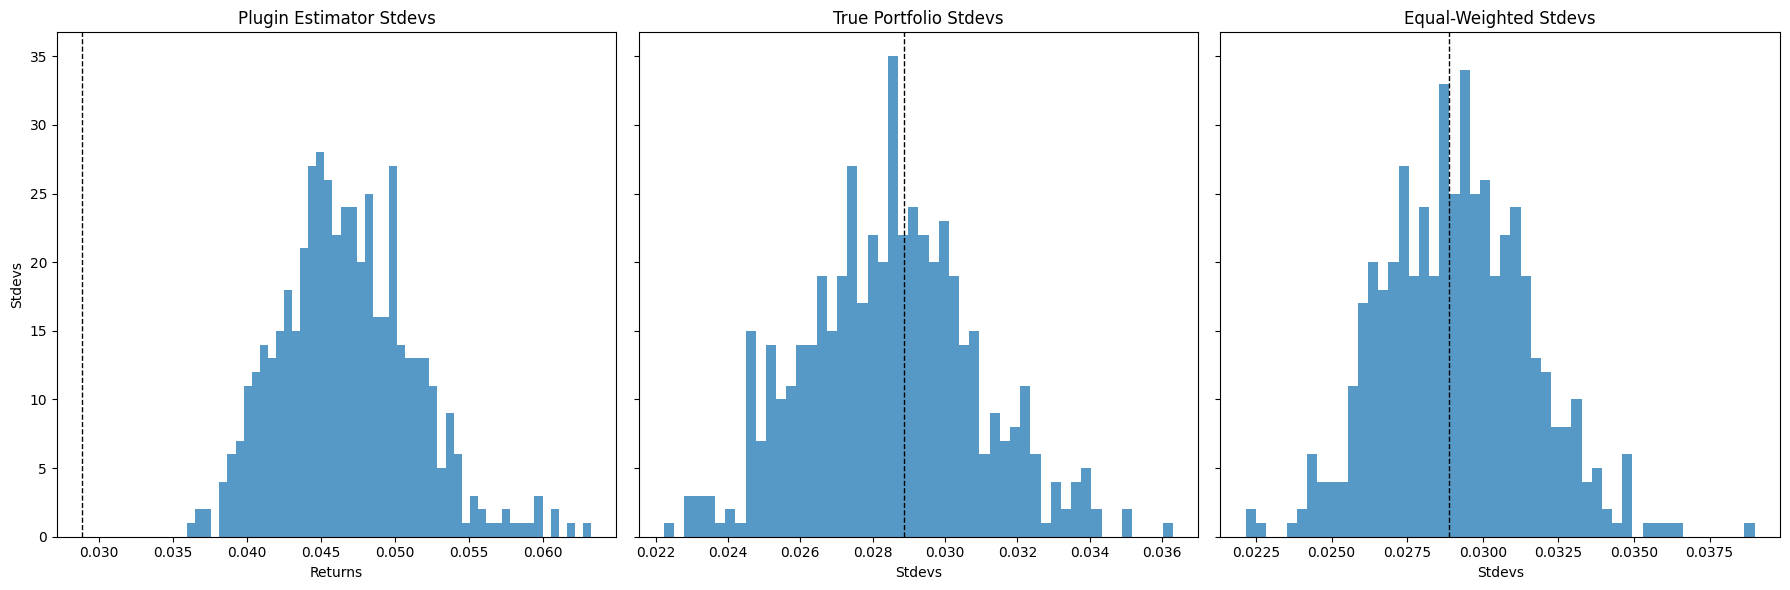

In [4]:
N = 25
all_plugin_stds = []
all_plugin_sr = []
all_true_stds = []
all_true_sr = []
all_ew_stds = []
all_ew_sr = []

# Simulate 500 panels
for _ in range(500):
    plugin_returns, true_returns, ew_returns = simulation()

    all_plugin_stds.append(np.nanstd(plugin_returns))
    all_true_stds.append(np.nanstd(true_returns))
    all_ew_stds.append(np.nanstd(ew_returns))

    all_plugin_sr.append(np.nanmean(plugin_returns)/np.nanstd(plugin_returns))
    all_true_sr.append(np.nanmean(true_returns)/np.nanstd(true_returns))
    all_ew_sr.append(np.nanmean(ew_returns)/np.nanstd(ew_returns))

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax[0].hist(all_plugin_stds, bins=50, alpha=0.75, label='Plugin')
ax[0].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)

ax[0].set_title('Plugin Estimator Stdevs')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('Stdevs')

ax[1].hist(all_true_stds, bins=50, alpha=0.75, label='True')
ax[1].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[1].set_title('True Portfolio Stdevs')
ax[1].set_xlabel('Stdevs')

ax[2].hist(all_ew_stds, bins=50, alpha=0.75, label='Equal-Weighted')
ax[2].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[2].set_title('Equal-Weighted Stdevs')
ax[2].set_xlabel('Stdevs')

plt.tight_layout()
plt.show()


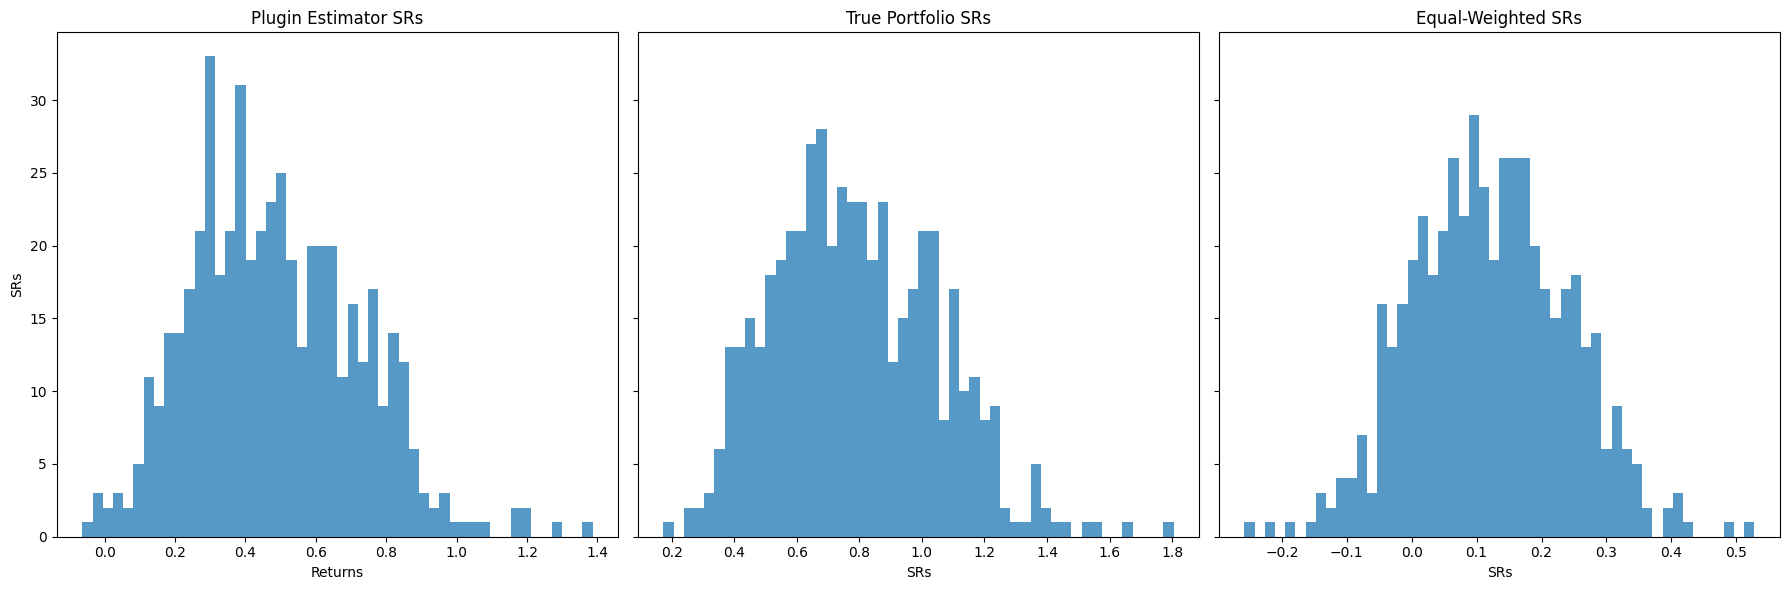

In [5]:
# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax[0].hist(all_plugin_sr, bins=50, alpha=0.75, label='Plugin')

ax[0].set_title('Plugin Estimator SRs')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('SRs')

ax[1].hist(all_true_sr, bins=50, alpha=0.75, label='True')
ax[1].set_title('True Portfolio SRs')
ax[1].set_xlabel('SRs')

ax[2].hist(all_ew_sr, bins=50, alpha=0.75, label='Equal-Weighted')
ax[2].set_title('Equal-Weighted SRs')
ax[2].set_xlabel('SRs')

plt.tight_layout()
plt.show()

<ipython-input-1-1d0a456b40ca>:34: RuntimeWarning: invalid value encountered in sqrt
  weights_plugin *= target_sd/np.sqrt(weights_plugin.T @ covar_mat_hat @ weights_plugin)


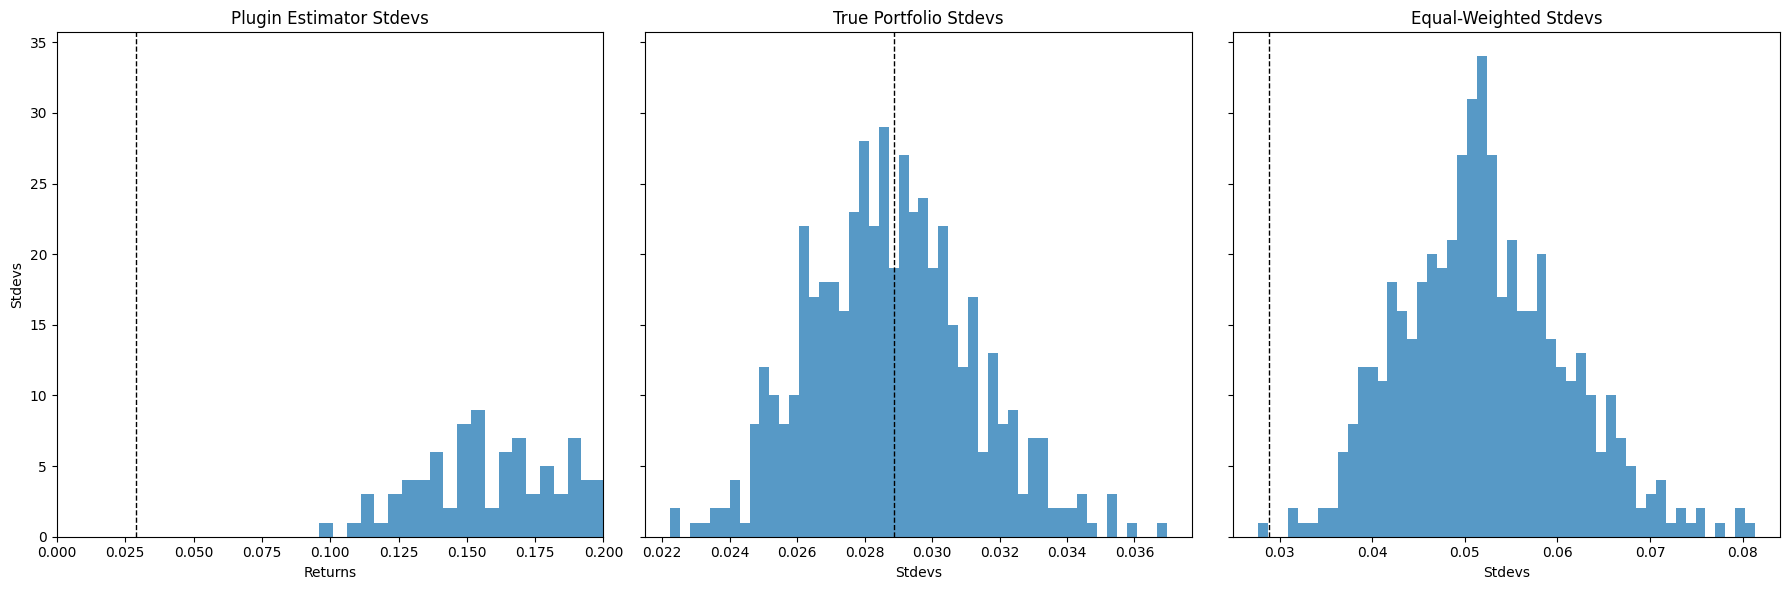

In [9]:
np.random.seed(0)
N = 50

all_plugin_stds = []
all_plugin_sr = []
all_true_stds = []
all_true_sr = []
all_ew_stds = []
all_ew_sr = []

# Simulate 500 panels
for _ in range(500):
    plugin_returns, true_returns, ew_returns = simulation()

    all_plugin_stds.append(np.nanstd(plugin_returns))
    all_true_stds.append(np.nanstd(true_returns))
    all_ew_stds.append(np.nanstd(ew_returns))

    all_plugin_sr.append(np.nanmean(plugin_returns)/np.nanstd(plugin_returns))
    all_true_sr.append(np.nanmean(true_returns)/np.nanstd(true_returns))
    all_ew_sr.append(np.nanmean(ew_returns)/np.nanstd(ew_returns))

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax[0].hist(all_plugin_stds, bins=np.linspace(0, 0.5, 100), alpha=0.75, label='Plugin')
ax[0].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[0].set_xlim([0, 0.2])

ax[0].set_title('Plugin Estimator Stdevs')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('Stdevs')

ax[1].hist(all_true_stds, bins=50, alpha=0.75, label='True')
ax[1].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[1].set_title('True Portfolio Stdevs')
ax[1].set_xlabel('Stdevs')

ax[2].hist(all_ew_stds, bins=50, alpha=0.75, label='Equal-Weighted')
ax[2].axvline(target_sd, color='k', linestyle='dashed', linewidth=1)
ax[2].set_title('Equal-Weighted Stdevs')
ax[2].set_xlabel('Stdevs')

plt.tight_layout()
plt.show()


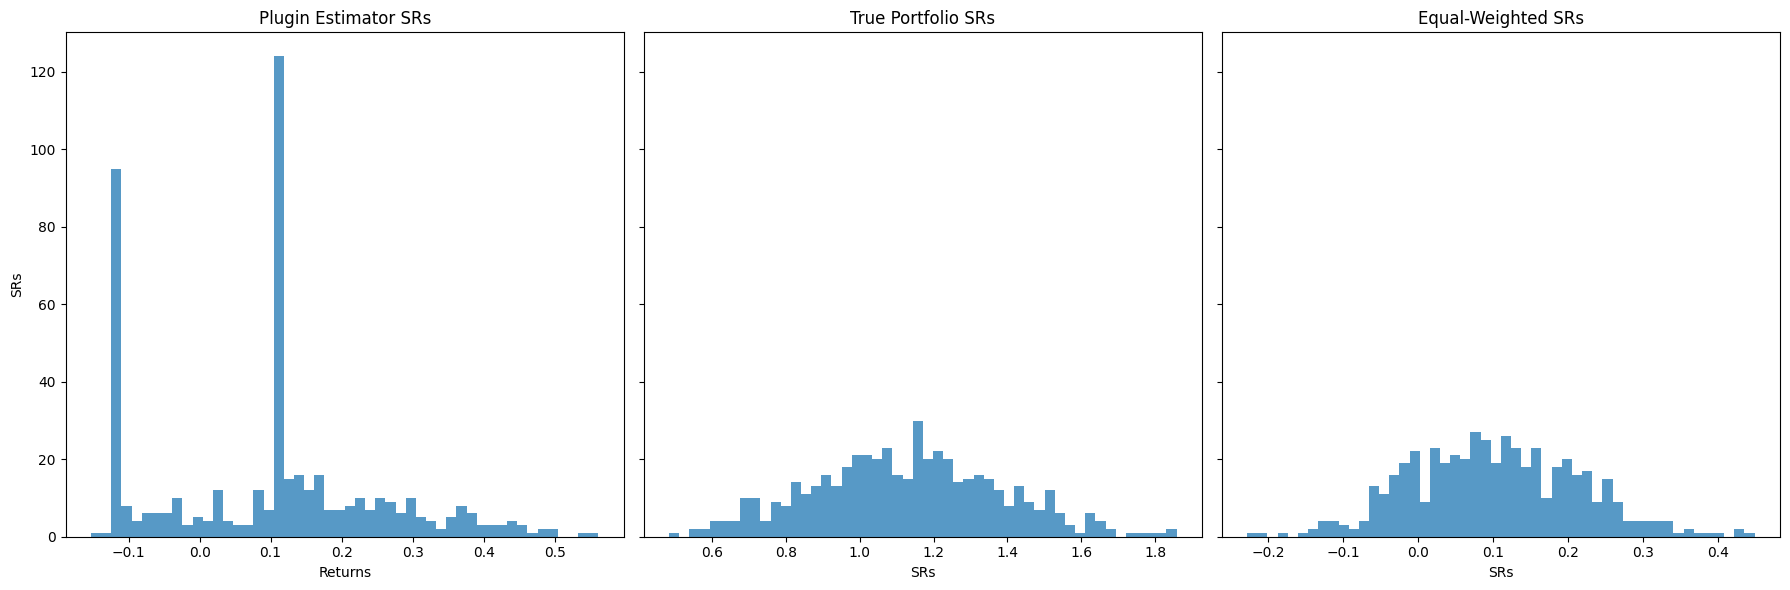

In [10]:
# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
bin_edges = np.linspace(-0.2, 0.2, 100)
ax[0].hist(all_plugin_sr, bins=50, alpha=0.75, label='Plugin')

ax[0].set_title('Plugin Estimator SRs')
ax[0].set_xlabel('Returns')
ax[0].set_ylabel('SRs')

ax[1].hist(all_true_sr, bins=50, alpha=0.75, label='True')
ax[1].set_title('True Portfolio SRs')
ax[1].set_xlabel('SRs')

ax[2].hist(all_ew_sr, bins=50, alpha=0.75, label='Equal-Weighted')
ax[2].set_title('Equal-Weighted SRs')
ax[2].set_xlabel('SRs')

plt.tight_layout()
plt.show()